In [1]:
# Standard modules
import pdb
import sys
import os
import pickle
import numpy as np
import pandas as pd
from lmfit import Parameters, minimize, fit_report
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")

sys.path.append("..")

from simstackwrapper import SimstackWrapper
from simstackresults import SimstackResults
from simstackplots import SimstackPlots
from simstacktoolbox import SimstackToolbox

from IPython.core.display import display, HTML
display(HTML("<style>.container { width:98% !important; }</style>"))

In [2]:
# Import catalog with SimstackWrapper
combined_pickle_filename = "cosmos2020_farmer_nuvrj_0p01_0p5_1_1p5_2_2p5_3_3p5_4_5_6_8_10p0_X_4_foregnd_atonce_bootstrap_1-150"
combined_pickle_path = os.environ['PICKLESPATH']+'/'+os.path.join("simstack","stacked_flux_densities", combined_pickle_filename)
underscore_suffix = ""
path_ini_file = os.path.join(combined_pickle_path, "cosmos2020_farmer.ini")
path_pickle_file = os.path.join(combined_pickle_path, combined_pickle_filename+".pkl")
if os.path.isfile(path_ini_file):
    simstack_catalog_object = SimstackWrapper(path_ini_file, read_maps=False, read_catalog=True, keep_catalog=True, stack_automatically=False, save_automatically=False)
else:
    print(path_ini_file+' not found')

In [3]:
# Import saved stacking results
simstack_object = SimstackToolbox.import_saved_pickles(path_pickle_file)

In [4]:
# Inspect object keys
simstack_object.results_dict['band_results_dict'].keys()

dict_keys(['mips_24', 'pacs_green', 'pacs_red', 'spire_psw', 'spire_pmw', 'spire_plw', 'scuba_850'])

In [5]:
# Pass saved results into SimstackResults
simstack_object = SimstackResults(simstack_object)

In [6]:
# Pass saved results into SimstackPlots
simstack_object = SimstackPlots(simstack_object)

In [7]:
# Call parse_results which translates the raw results into a results_dict for plotting/interpreting.
simstack_object.parse_results(catalog_object=simstack_catalog_object, estimate_mcmcs=False)

In [8]:
# Extract SEDs Dict
sed_results_dict = simstack_object.results_dict['sed_bootstrap_results_dict']

In [9]:
# Extract Bootstrap Dict
bootstrap_results_dict = simstack_object.results_dict['bootstrap_results_dict']

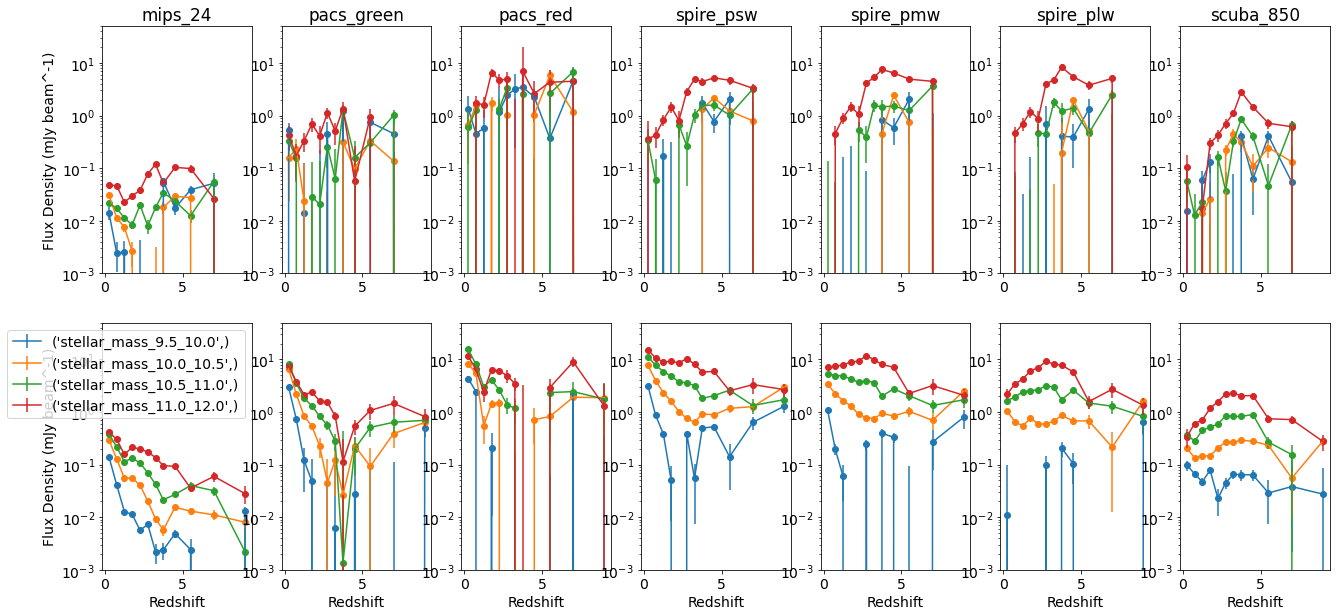

In [10]:
simstack_object.plot_flux_densities()

In [11]:
sample_number = 15000
sample_discard = 3000
sample_sigma = 3
sample_qt = True
sample_prior = '_mixed_prior_qt'
flat_prior = not_flat_prior
mips_penalty='auto'
sample_prefix = "{}-{}-{}sigma{}".format(sample_number, sample_discard, sample_sigma, sample_prior)
print(sample_prefix)

15000-3000-3sigma_mixed_prior_qt


In [10]:
# List bins to impose a Temperature prior on.  These are bins that find unphysical local minima.
not_flat_prior = ['redshift_1.5_2.0__stellar_mass_9.5_10.0__split_params_1',
                  'redshift_1.5_2.0__stellar_mass_10.0_10.5__split_params_1',
                  'redshift_1.5_2.0__stellar_mass_10.5_11.0__split_params_1',
                  'redshift_2.0_2.5__stellar_mass_10.0_10.5__split_params_1',
                  'redshift_2.0_2.5__stellar_mass_10.5_11.0__split_params_1']

In [12]:
sample_number = 15000
sample_discard = 5000
sample_sigma = 3
sample_qt = False
sample_prior = '_mixed_prior'
flat_prior = not_flat_prior
mips_penalty='auto'
sample_prefix = "{}-{}-{}sigma{}".format(sample_number, sample_discard, sample_sigma, sample_prior)
print(sample_prefix)

1500-500-3sigma_mixed_prior


In [13]:
# Load MCMC results
include_qt = sample_qt
overwrite_samples = True
samples_filename  ='_'.join(['mcmc_samples',sample_prefix,'dict'])+'.pkl'
print(os.path.isfile(os.path.join(combined_pickle_path+underscore_suffix,samples_filename)))
if os.path.isfile(os.path.join(combined_pickle_path+underscore_suffix,samples_filename)) and not overwrite_samples:
    flat_samples_dict = SimstackToolbox.import_saved_pickles(os.path.join(combined_pickle_path+underscore_suffix,samples_filename))
    print('importing ',flat_samples_dict.keys())
else:
    print('estimating ',samples_filename)
    flat_samples_dict = simstack_object.loop_mcmc_sed_estimator(sed_results_dict, simstack_catalog_object.catalog_dict['tables'], 
                                                                mcmc_iterations=sample_number, mcmc_discard=sample_discard, sigma_upper_limit=sample_sigma,
                                                                flat_prior=flat_prior, include_qt=include_qt, mips_penalty=mips_penalty)

False
estimating  mcmc_samples_1500-500-3sigma_mixed_prior_dict.pkl
redshift_0.01_0.5__stellar_mass_9.5_10.0__split_params_1 : T_rf_init(z=0.4) = 24.6+-0.25, A_init(z=0.4) = -36.3+-0.10


100%|██████████████████████████████████████████████████████████████████████████████| 1500/1500 [00:47<00:00, 31.40it/s]


redshift_0.01_0.5__stellar_mass_10.0_10.5__split_params_1 : T_rf_init(z=0.4) = 24.7+-0.25, A_init(z=0.4) = -35.8+-0.10


100%|██████████████████████████████████████████████████████████████████████████████| 1500/1500 [00:42<00:00, 35.02it/s]


redshift_0.01_0.5__stellar_mass_10.5_11.0__split_params_1 : T_rf_init(z=0.4) = 24.9+-0.25, A_init(z=0.4) = -35.3+-0.10


100%|██████████████████████████████████████████████████████████████████████████████| 1500/1500 [00:42<00:00, 35.33it/s]


redshift_0.01_0.5__stellar_mass_11.0_12.0__split_params_1 : T_rf_init(z=0.4) = 25.0+-0.25, A_init(z=0.4) = -34.8+-0.10


100%|██████████████████████████████████████████████████████████████████████████████| 1500/1500 [00:41<00:00, 36.50it/s]


redshift_0.5_1.0__stellar_mass_9.5_10.0__split_params_1 : T_rf_init(z=0.8) = 27.6+-0.25, A_init(z=0.8) = -36.4+-0.10


100%|██████████████████████████████████████████████████████████████████████████████| 1500/1500 [00:46<00:00, 32.55it/s]


redshift_0.5_1.0__stellar_mass_10.0_10.5__split_params_1 : T_rf_init(z=0.8) = 27.6+-0.25, A_init(z=0.8) = -35.8+-0.10


100%|██████████████████████████████████████████████████████████████████████████████| 1500/1500 [00:41<00:00, 36.34it/s]


redshift_0.5_1.0__stellar_mass_10.5_11.0__split_params_1 : T_rf_init(z=0.8) = 27.6+-0.25, A_init(z=0.8) = -35.3+-0.10


100%|██████████████████████████████████████████████████████████████████████████████| 1500/1500 [00:41<00:00, 36.37it/s]


redshift_0.5_1.0__stellar_mass_11.0_12.0__split_params_1 : T_rf_init(z=0.8) = 27.7+-0.25, A_init(z=0.8) = -34.8+-0.10


100%|██████████████████████████████████████████████████████████████████████████████| 1500/1500 [00:40<00:00, 36.60it/s]


redshift_1.0_1.5__stellar_mass_9.5_10.0__split_params_1 : T_rf_init(z=1.3) = 30.5+-0.25, A_init(z=1.3) = -36.4+-0.10


100%|██████████████████████████████████████████████████████████████████████████████| 1500/1500 [00:46<00:00, 32.51it/s]


redshift_1.0_1.5__stellar_mass_10.0_10.5__split_params_1 : T_rf_init(z=1.3) = 30.5+-0.25, A_init(z=1.3) = -35.8+-0.10


100%|██████████████████████████████████████████████████████████████████████████████| 1500/1500 [00:41<00:00, 36.10it/s]


redshift_1.0_1.5__stellar_mass_10.5_11.0__split_params_1 : T_rf_init(z=1.3) = 30.5+-0.25, A_init(z=1.3) = -35.3+-0.10


100%|██████████████████████████████████████████████████████████████████████████████| 1500/1500 [00:44<00:00, 34.07it/s]


redshift_1.0_1.5__stellar_mass_11.0_12.0__split_params_1 : T_rf_init(z=1.3) = 30.6+-0.25, A_init(z=1.3) = -34.8+-0.10


100%|██████████████████████████████████████████████████████████████████████████████| 1500/1500 [00:46<00:00, 31.97it/s]


redshift_1.5_2.0__stellar_mass_9.5_10.0__split_params_1  informative prior
redshift_1.5_2.0__stellar_mass_9.5_10.0__split_params_1 : T_rf_prior(z=1.8) = 34.2+-0.25, A_prior(z=1.8) = -36.4+-0.10


100%|██████████████████████████████████████████████████████████████████████████████| 1500/1500 [00:48<00:00, 30.85it/s]


redshift_1.5_2.0__stellar_mass_10.0_10.5__split_params_1 : T_rf_init(z=1.8) = 34.1+-0.25, A_init(z=1.8) = -35.8+-0.10


100%|██████████████████████████████████████████████████████████████████████████████| 1500/1500 [00:40<00:00, 36.59it/s]


redshift_1.5_2.0__stellar_mass_10.5_11.0__split_params_1 : T_rf_init(z=1.8) = 34.0+-0.25, A_init(z=1.8) = -35.3+-0.10


100%|██████████████████████████████████████████████████████████████████████████████| 1500/1500 [00:41<00:00, 36.44it/s]


redshift_1.5_2.0__stellar_mass_11.0_12.0__split_params_1 : T_rf_init(z=1.7) = 33.9+-0.25, A_init(z=1.7) = -34.8+-0.10


100%|██████████████████████████████████████████████████████████████████████████████| 1500/1500 [00:42<00:00, 35.53it/s]


redshift_2.0_2.5__stellar_mass_9.5_10.0__split_params_1  informative prior
redshift_2.0_2.5__stellar_mass_9.5_10.0__split_params_1 : T_rf_prior(z=2.3) = 37.7+-0.25, A_prior(z=2.3) = -36.4+-0.10


100%|██████████████████████████████████████████████████████████████████████████████| 1500/1500 [00:47<00:00, 31.49it/s]


redshift_2.0_2.5__stellar_mass_10.0_10.5__split_params_1 : T_rf_init(z=2.2) = 37.5+-0.25, A_init(z=2.2) = -35.9+-0.10


100%|██████████████████████████████████████████████████████████████████████████████| 1500/1500 [00:46<00:00, 32.59it/s]


redshift_2.0_2.5__stellar_mass_10.5_11.0__split_params_1 : T_rf_init(z=2.2) = 37.3+-0.25, A_init(z=2.2) = -35.3+-0.10


100%|██████████████████████████████████████████████████████████████████████████████| 1500/1500 [00:47<00:00, 31.62it/s]


redshift_2.0_2.5__stellar_mass_11.0_12.0__split_params_1 : T_rf_init(z=2.2) = 37.2+-0.25, A_init(z=2.2) = -34.9+-0.10


100%|██████████████████████████████████████████████████████████████████████████████| 1500/1500 [00:44<00:00, 33.88it/s]


redshift_2.5_3.0__stellar_mass_9.5_10.0__split_params_1 : T_rf_init(z=2.7) = 40.9+-0.25, A_init(z=2.7) = -36.5+-0.10


100%|██████████████████████████████████████████████████████████████████████████████| 1500/1500 [00:47<00:00, 31.79it/s]


redshift_2.5_3.0__stellar_mass_10.0_10.5__split_params_1 : T_rf_init(z=2.7) = 41.1+-0.25, A_init(z=2.7) = -35.9+-0.10


100%|██████████████████████████████████████████████████████████████████████████████| 1500/1500 [00:46<00:00, 32.21it/s]


redshift_2.5_3.0__stellar_mass_10.5_11.0__split_params_1 : T_rf_init(z=2.7) = 41.2+-0.25, A_init(z=2.7) = -35.4+-0.10


100%|██████████████████████████████████████████████████████████████████████████████| 1500/1500 [00:41<00:00, 36.24it/s]


redshift_2.5_3.0__stellar_mass_11.0_12.0__split_params_1 : T_rf_init(z=2.8) = 41.8+-0.25, A_init(z=2.8) = -34.9+-0.10


100%|██████████████████████████████████████████████████████████████████████████████| 1500/1500 [00:41<00:00, 36.14it/s]


redshift_3.0_3.5__stellar_mass_9.5_10.0__split_params_1  informative prior
redshift_3.0_3.5__stellar_mass_9.5_10.0__split_params_1 : T_rf_prior(z=3.2) = 45.4+-0.25, A_prior(z=3.2) = -36.5+-0.10


100%|██████████████████████████████████████████████████████████████████████████████| 1500/1500 [00:47<00:00, 31.69it/s]


redshift_3.0_3.5__stellar_mass_10.0_10.5__split_params_1 : T_rf_init(z=3.2) = 45.3+-0.25, A_init(z=3.2) = -36.0+-0.10


100%|██████████████████████████████████████████████████████████████████████████████| 1500/1500 [00:46<00:00, 32.04it/s]


redshift_3.0_3.5__stellar_mass_10.5_11.0__split_params_1 : T_rf_init(z=3.2) = 45.0+-0.25, A_init(z=3.2) = -35.4+-0.10


100%|██████████████████████████████████████████████████████████████████████████████| 1500/1500 [00:41<00:00, 35.87it/s]


redshift_3.0_3.5__stellar_mass_11.0_12.0__split_params_1 : T_rf_init(z=3.1) = 44.6+-0.25, A_init(z=3.1) = -34.9+-0.10


100%|██████████████████████████████████████████████████████████████████████████████| 1500/1500 [00:41<00:00, 35.91it/s]


redshift_3.5_4.0__stellar_mass_9.5_10.0__split_params_1 : T_rf_init(z=3.7) = 49.8+-0.25, A_init(z=3.7) = -36.5+-0.10


100%|██████████████████████████████████████████████████████████████████████████████| 1500/1500 [00:46<00:00, 32.10it/s]


redshift_3.5_4.0__stellar_mass_10.0_10.5__split_params_1  informative prior
redshift_3.5_4.0__stellar_mass_10.0_10.5__split_params_1 : T_rf_prior(z=3.7) = 49.6+-0.25, A_prior(z=3.7) = -36.0+-0.10


100%|██████████████████████████████████████████████████████████████████████████████| 1500/1500 [00:47<00:00, 31.76it/s]


redshift_3.5_4.0__stellar_mass_10.5_11.0__split_params_1 : T_rf_init(z=3.7) = 49.7+-0.25, A_init(z=3.7) = -35.5+-0.10


100%|██████████████████████████████████████████████████████████████████████████████| 1500/1500 [00:46<00:00, 32.13it/s]


redshift_3.5_4.0__stellar_mass_11.0_12.0__split_params_1 : T_rf_init(z=3.8) = 49.9+-0.25, A_init(z=3.8) = -35.0+-0.10


100%|██████████████████████████████████████████████████████████████████████████████| 1500/1500 [00:47<00:00, 31.45it/s]


redshift_4.0_5.0__stellar_mass_9.5_10.0__split_params_1 : T_rf_init(z=4.4) = 55.9+-0.25, A_init(z=4.4) = -36.6+-0.10


100%|██████████████████████████████████████████████████████████████████████████████| 1500/1500 [00:50<00:00, 29.45it/s]


redshift_4.0_5.0__stellar_mass_10.0_10.5__split_params_1 : T_rf_init(z=4.5) = 56.8+-0.25, A_init(z=4.5) = -36.0+-0.10


100%|██████████████████████████████████████████████████████████████████████████████| 1500/1500 [00:43<00:00, 34.13it/s]


redshift_4.0_5.0__stellar_mass_10.5_11.0__split_params_1 : T_rf_init(z=4.5) = 56.6+-0.25, A_init(z=4.5) = -35.5+-0.10


100%|██████████████████████████████████████████████████████████████████████████████| 1500/1500 [00:46<00:00, 32.28it/s]


redshift_4.0_5.0__stellar_mass_11.0_12.0__split_params_1 : T_rf_init(z=4.4) = 55.9+-0.25, A_init(z=4.4) = -34.9+-0.10


100%|██████████████████████████████████████████████████████████████████████████████| 1500/1500 [00:49<00:00, 30.04it/s]


redshift_5.0_6.0__stellar_mass_9.5_10.0__split_params_1  informative prior
redshift_5.0_6.0__stellar_mass_9.5_10.0__split_params_1 : T_rf_prior(z=5.4) = 65.2+-0.25, A_prior(z=5.4) = -36.6+-0.10


100%|██████████████████████████████████████████████████████████████████████████████| 1500/1500 [00:43<00:00, 34.27it/s]


redshift_5.0_6.0__stellar_mass_10.0_10.5__split_params_1 : T_rf_init(z=5.4) = 65.4+-0.25, A_init(z=5.4) = -36.1+-0.10


100%|██████████████████████████████████████████████████████████████████████████████| 1500/1500 [00:44<00:00, 33.87it/s]


redshift_5.0_6.0__stellar_mass_10.5_11.0__split_params_1 : T_rf_init(z=5.3) = 64.0+-0.25, A_init(z=5.3) = -35.5+-0.10


100%|██████████████████████████████████████████████████████████████████████████████| 1500/1500 [00:39<00:00, 38.42it/s]


redshift_5.0_6.0__stellar_mass_11.0_12.0__split_params_1 : T_rf_init(z=5.3) = 64.1+-0.25, A_init(z=5.3) = -35.0+-0.10


100%|██████████████████████████████████████████████████████████████████████████████| 1500/1500 [00:38<00:00, 38.83it/s]


redshift_6.0_8.0__stellar_mass_9.5_10.0__split_params_1 : T_rf_init(z=6.4) = 75.9+-0.25, A_init(z=6.4) = -36.6+-0.10


100%|██████████████████████████████████████████████████████████████████████████████| 1500/1500 [00:43<00:00, 34.32it/s]


redshift_6.0_8.0__stellar_mass_10.0_10.5__split_params_1 : T_rf_init(z=6.8) = 79.9+-0.25, A_init(z=6.8) = -36.1+-0.10


100%|██████████████████████████████████████████████████████████████████████████████| 1500/1500 [00:39<00:00, 38.21it/s]


redshift_6.0_8.0__stellar_mass_10.5_11.0__split_params_1  informative prior
redshift_6.0_8.0__stellar_mass_10.5_11.0__split_params_1 : T_rf_prior(z=6.9) = 81.8+-0.25, A_prior(z=6.9) = -35.5+-0.10


100%|██████████████████████████████████████████████████████████████████████████████| 1500/1500 [00:40<00:00, 36.80it/s]


redshift_6.0_8.0__stellar_mass_11.0_12.0__split_params_1  informative prior
redshift_6.0_8.0__stellar_mass_11.0_12.0__split_params_1 : T_rf_prior(z=6.9) = 82.0+-0.25, A_prior(z=6.9) = -35.0+-0.10


100%|██████████████████████████████████████████████████████████████████████████████| 1500/1500 [00:39<00:00, 37.69it/s]


redshift_8.0_10.0__stellar_mass_9.5_10.0__split_params_1 : T_rf_init(z=8.9) = 105.5+-0.25, A_init(z=8.9) = -36.7+-0.10


100%|██████████████████████████████████████████████████████████████████████████████| 1500/1500 [00:43<00:00, 34.36it/s]


redshift_8.0_10.0__stellar_mass_10.0_10.5__split_params_1 : T_rf_init(z=9.2) = 109.3+-0.25, A_init(z=9.2) = -36.2+-0.10


100%|██████████████████████████████████████████████████████████████████████████████| 1500/1500 [00:39<00:00, 38.20it/s]


redshift_8.0_10.0__stellar_mass_10.5_11.0__split_params_1 : T_rf_init(z=9.2) = 109.3+-0.25, A_init(z=9.2) = -35.7+-0.10


100%|██████████████████████████████████████████████████████████████████████████████| 1500/1500 [00:43<00:00, 34.70it/s]


redshift_8.0_10.0__stellar_mass_11.0_12.0__split_params_1 : T_rf_init(z=9.1) = 108.9+-0.25, A_init(z=9.1) = -35.1+-0.10


100%|██████████████████████████████████████████████████████████████████████████████| 1500/1500 [00:43<00:00, 34.19it/s]


In [14]:
# Save MCMC results
samples_filename  ='_'.join(['mcmc_samples',sample_prefix,'dict'])+'.pkl'
pickle_path = os.environ['PICKLESPATH']+'/'+os.path.join("simstack","stacked_flux_densities",combined_pickle_filename)
path_samples_file = os.path.join(combined_pickle_path+underscore_suffix, samples_filename)
print(path_samples_file)
simstack_object.save_to_pickles(path_samples_file, flat_samples_dict)

D:\pickles/simstack\stacked_flux_densities\spire\cosmos2020_farmer_nuvrj_0p01_0p5_1_1p5_2_2p5_3_3p5_4_5_6_8_10p0_X_4_foregnd_atonce_bootstrap_1-150\mcmc_samples_1500-500-3sigma_mixed_prior_dict.pkl


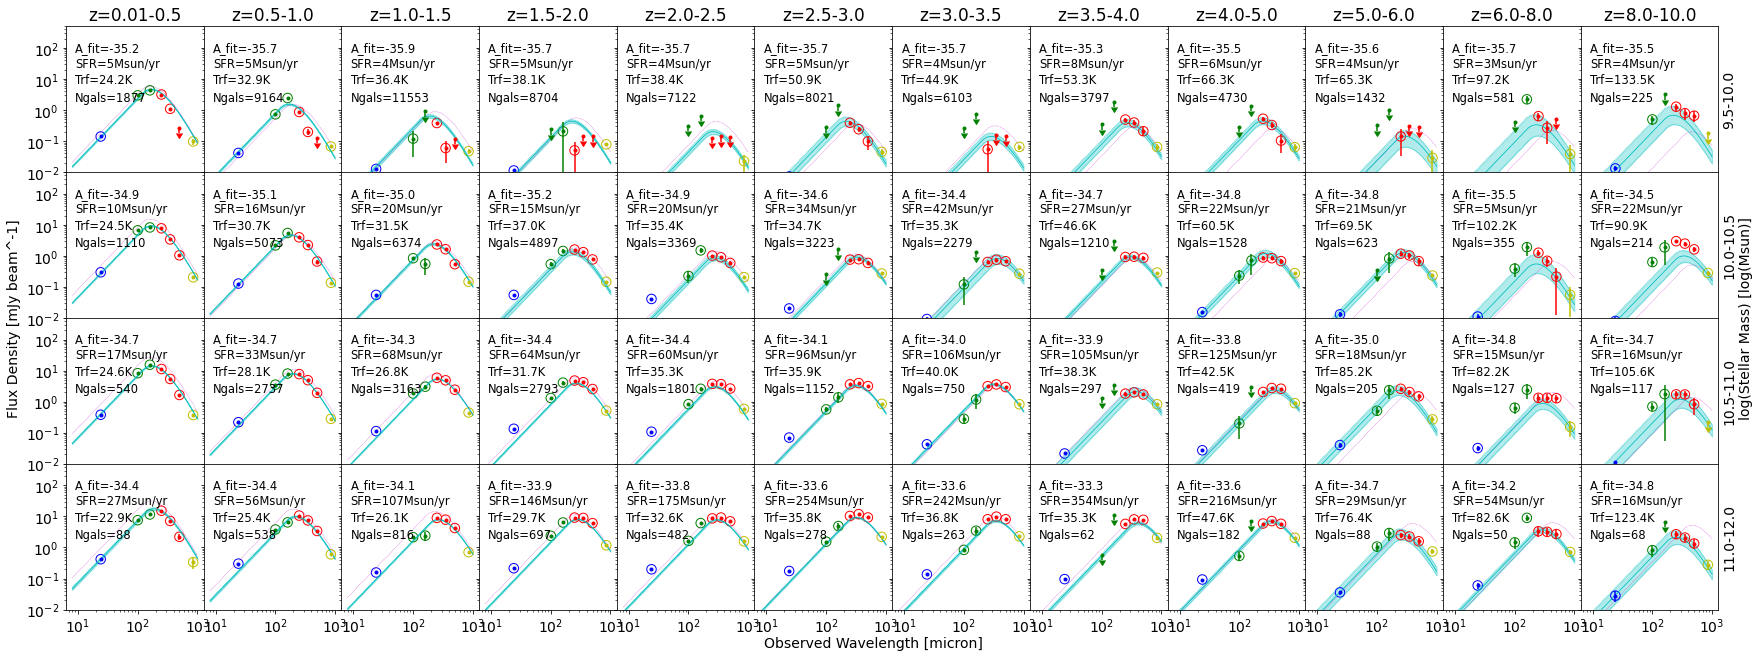

In [16]:
# Plot MCMC SEDs
simstack_object.plot_mcmc_seds(flat_samples_dict, bootstrap_dict=None, errors=('25', '75'), show_qt=False)

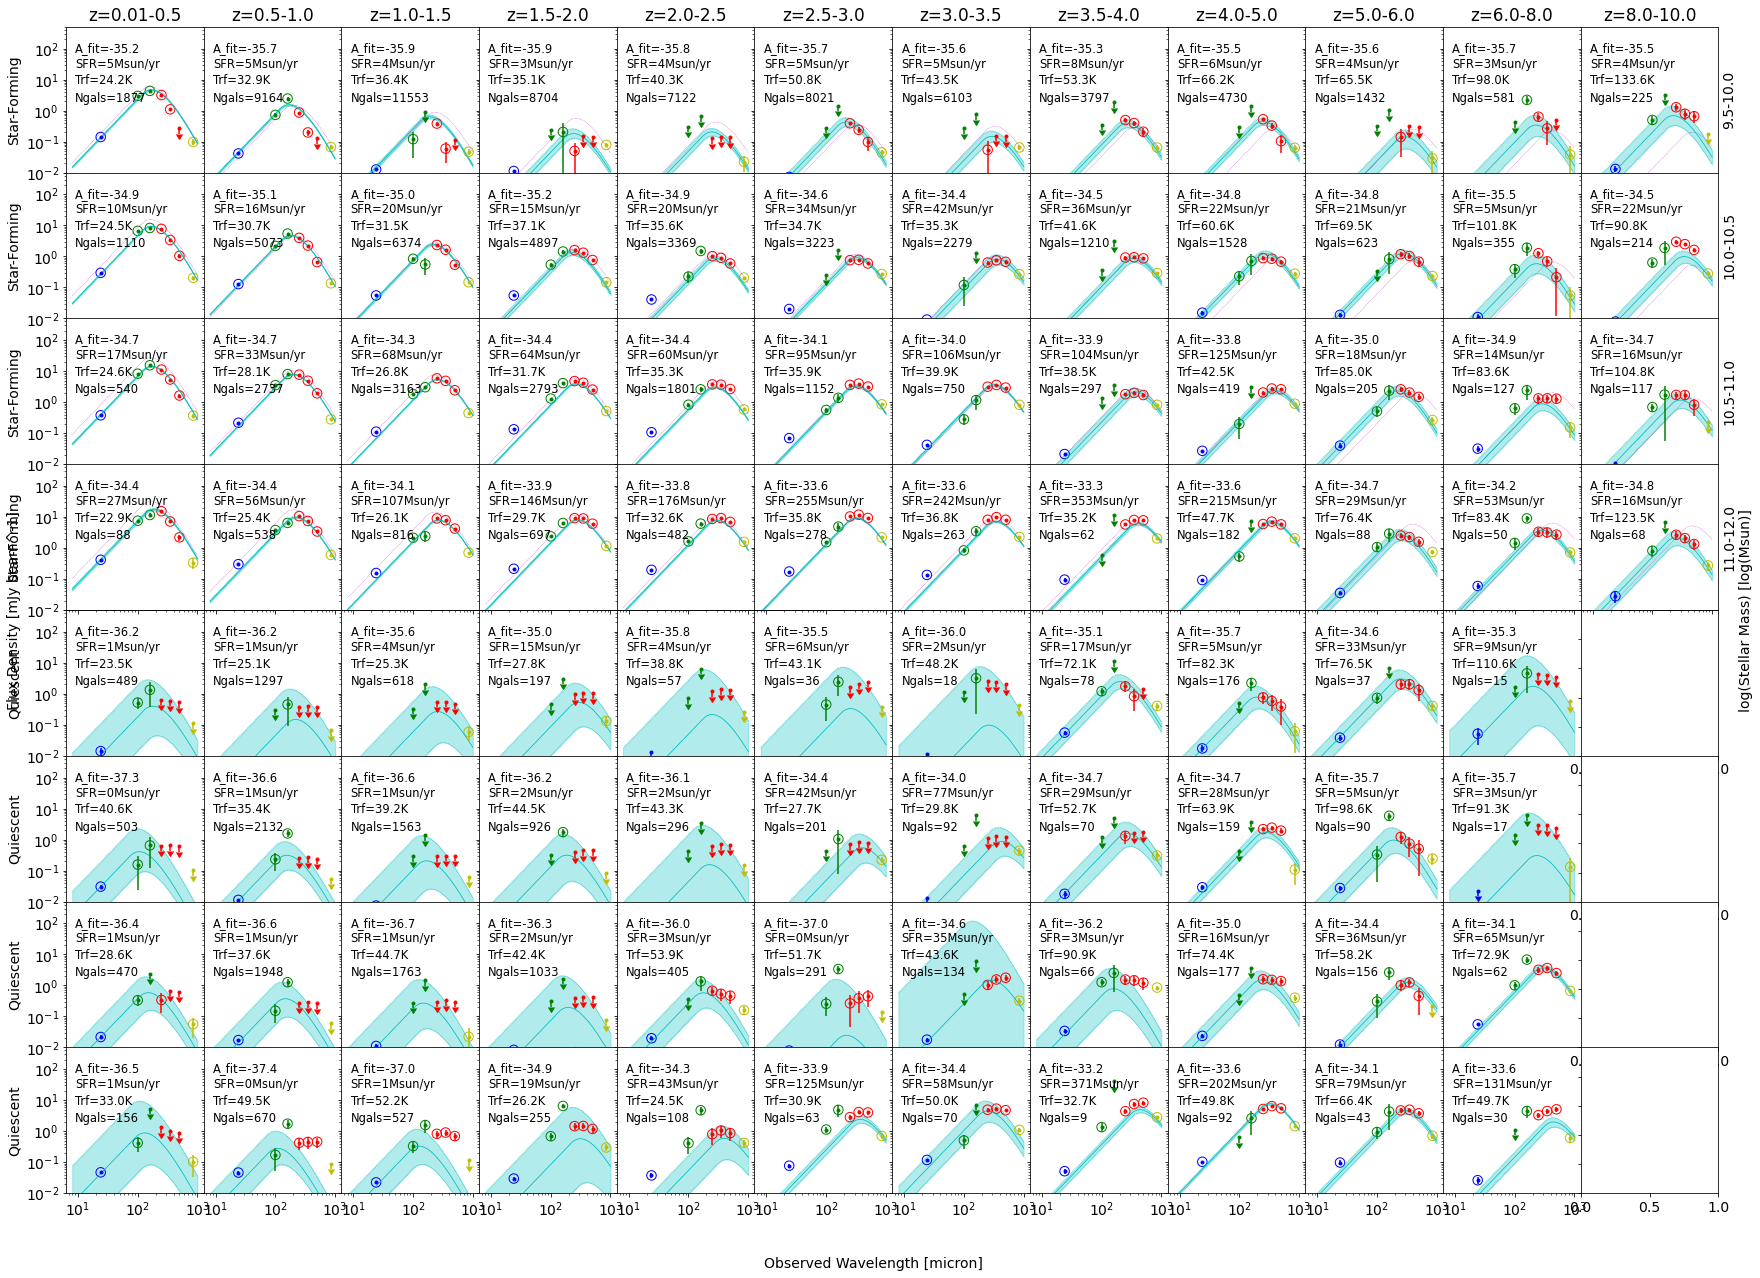

In [14]:
# Plot MCMC SEDs
simstack_object.plot_mcmc_seds(flat_samples_dict, bootstrap_dict=None, errors=('25', '75'), show_qt=True)